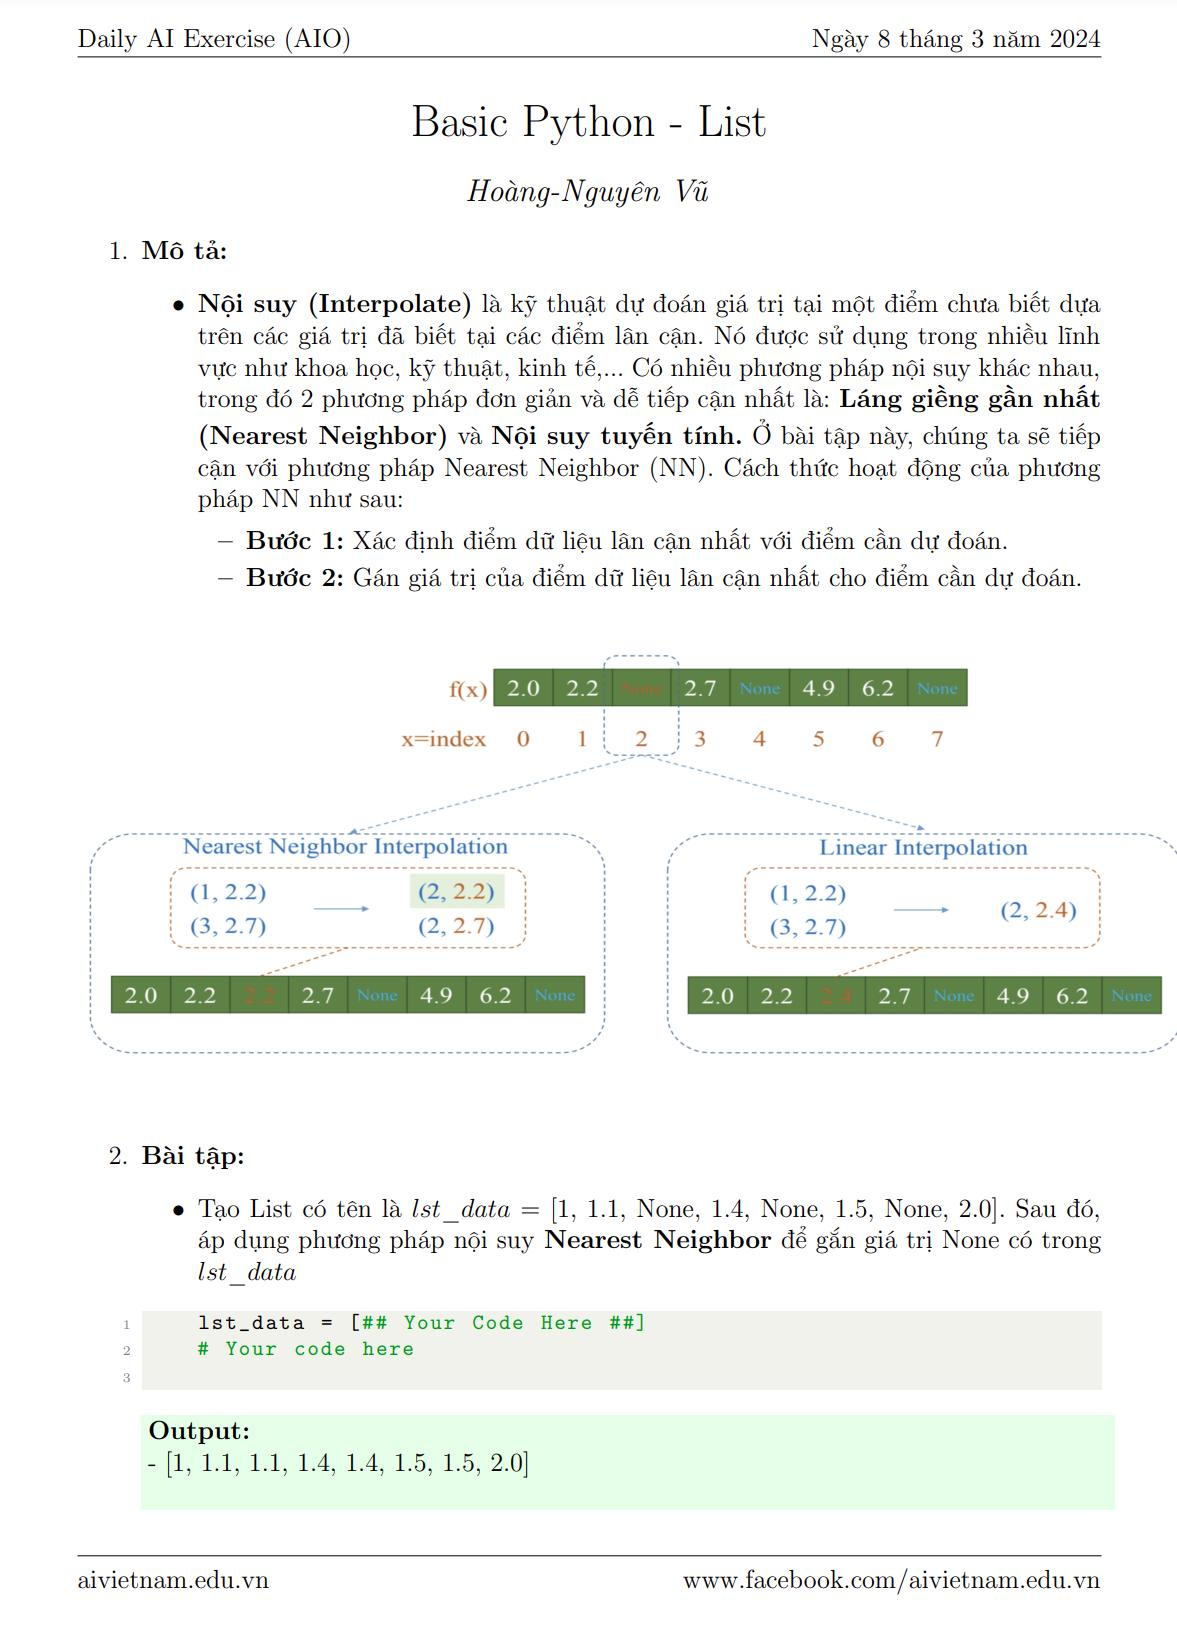

In [2]:
lst_data = [1, 1.1, None, 1.4, None, 1.5, None, 2.0]

for i in range(len(lst_data)):
    if lst_data[i] == None:
        lst_data[i] = lst_data[i-1]

print(lst_data)

[1, 1.1, 1.1, 1.4, 1.4, 1.5, 1.5, 2.0]


In [3]:
def find_none_index(data):
    result = -1

    for i, v in enumerate(data):
        if v==None:
            result = i
            break
    return result

def find_end(data, index):
    end = len(data)
    for i in range(index+1, len(data), 1):
        if data[i] != None:
            end = i
            break
    return end

def interpolate_nearest_neighbor(data, none_position):
    nearest_neighbor = None
    nearest_distance = float('inf')
    for index in range(len(data)):
        if data[index] is not None and abs(index - none_position) < nearest_distance:
            nearest_neighbor = data[index]
            nearest_distance = abs(index - none_position)

        return nearest_neighbor
    
def process_data(data):
    while True:
        index = find_none_index(data)
        if index == -1:
            break

        # find begin
        begin = index - 1

        # find end
        end = find_end(data, index)

        if begin<0:
            y = data[end]
        elif end>=len(data):
            y = data[begin]
        else:
            y = interpolate_nearest_neighbor(data, index)

        data[index] = y
    
    return data

# test
data = [1, 1.1, None, 1.4, None, 1.5, None, 2.0]
result = process_data(data)
print(data)

[1, 1.1, 1, 1.4, 1, 1.5, 1, 2.0]
